In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GMM
%matplotlib inline

In [2]:
from sklearn.mixture import BayesianGaussianMixture

In [3]:
from mpl_toolkits.mplot3d import Axes3D



In [4]:
# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

In [6]:
gas=pd.read_csv("sco-cen.csv",index_col=0)

In [7]:
gas.head()

,x,y,z,vx,vy,vz,id
0,-97.194204,-85.197691,-88.438109,6.158076,213.199731,2.396119,1.0
1,-42.552635,-87.704235,-78.201006,6.114842,212.755781,2.094273,1.0
2,-56.618763,-94.316484,-82.573662,4.171674,212.820311,2.174304,1.0
3,-76.672044,-59.663928,-96.309322,5.310793,212.972091,4.034915,1.0
4,-37.592208,-75.046785,-86.366686,6.777685,211.303613,2.055336,1.0


In [8]:
X=gas[['x','y','z','vz','vy','vz']]

7709.9311667


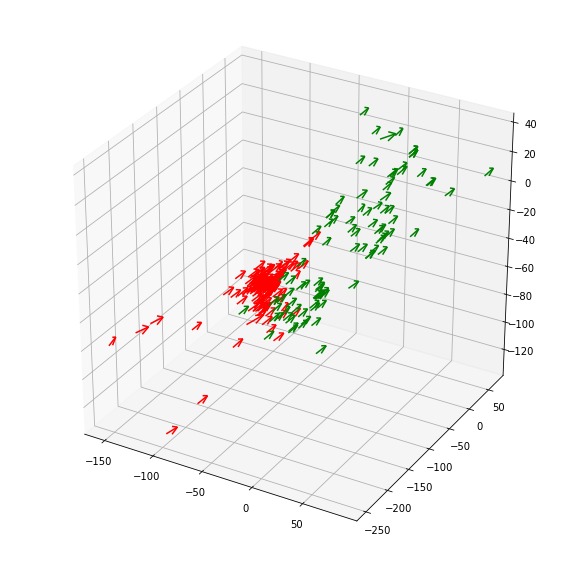

7690.18349568


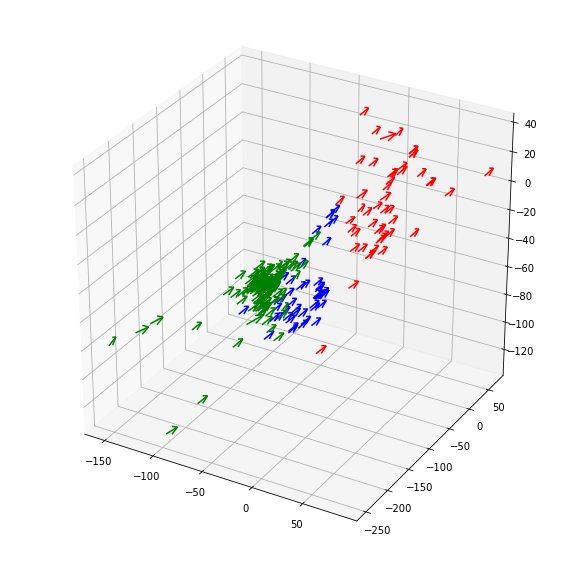

7526.32971401


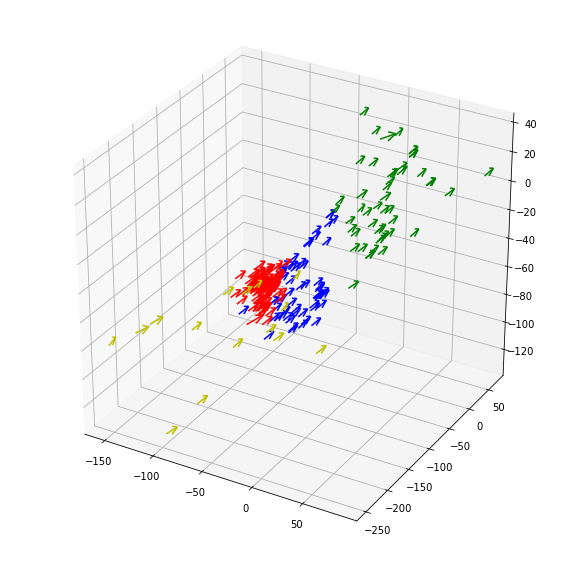

7566.41485285


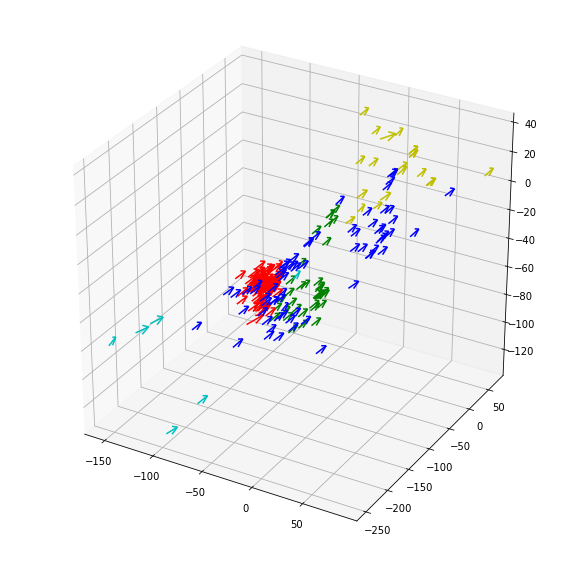

7578.48676179


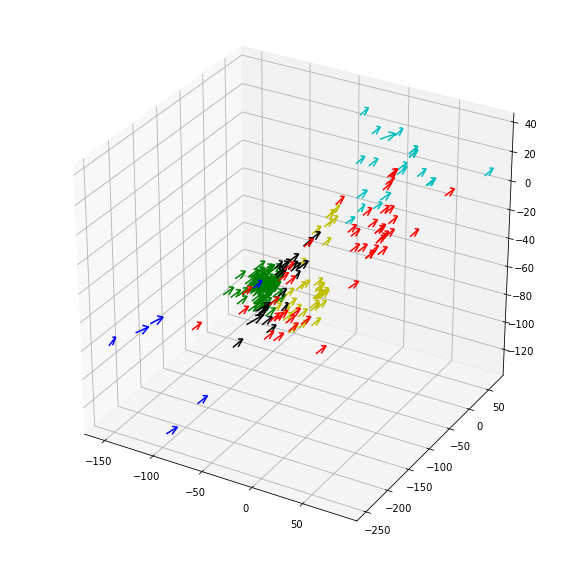

7716.40599064


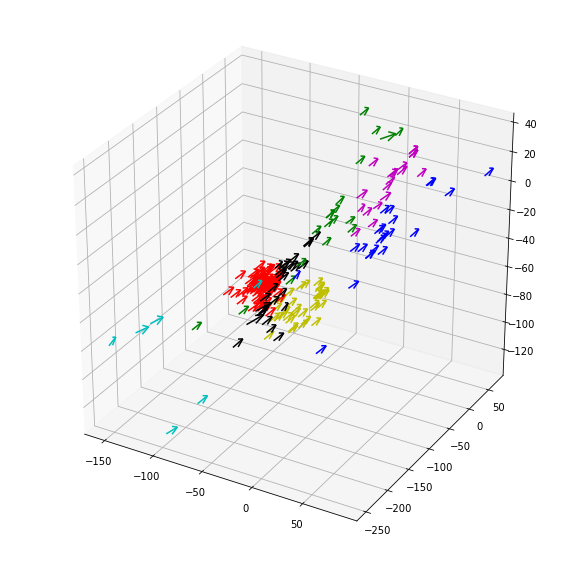

7713.46930105


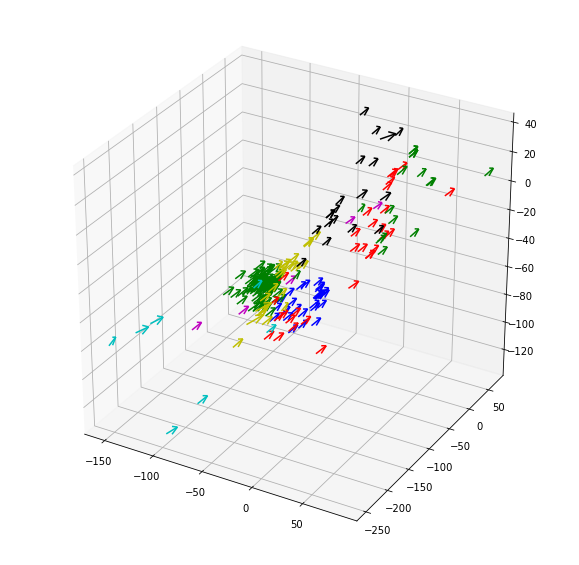

7794.23016985


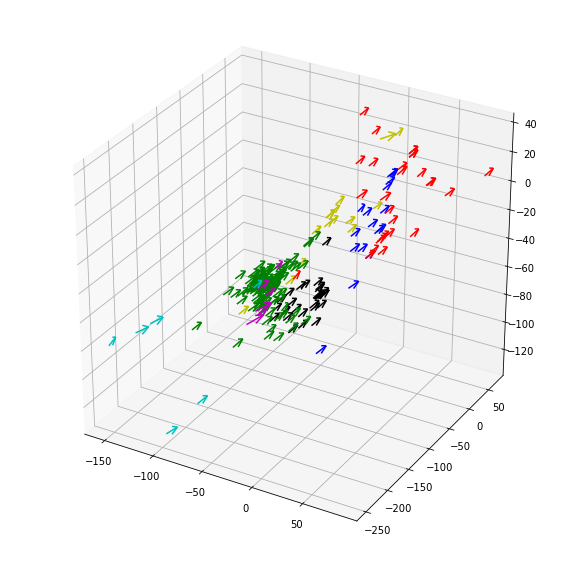

7962.73059601


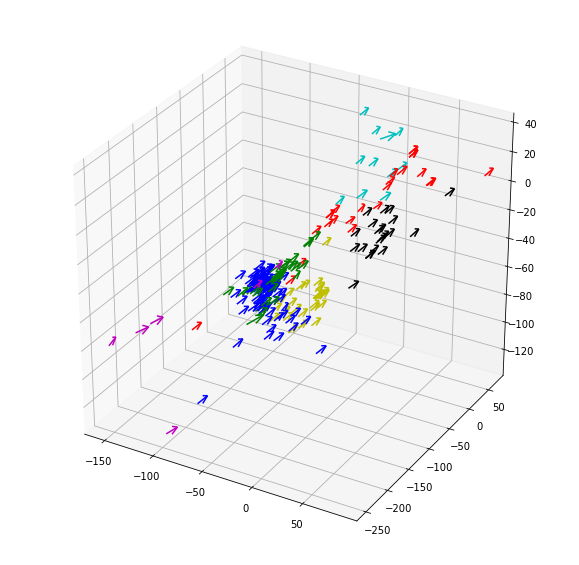

7948.39066578


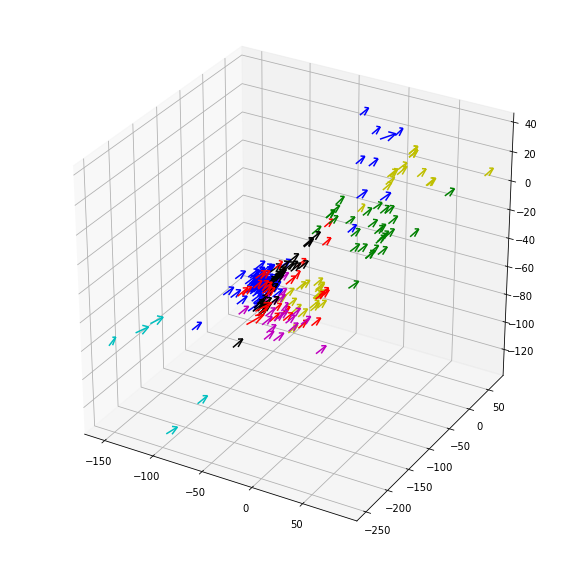

7995.31869737


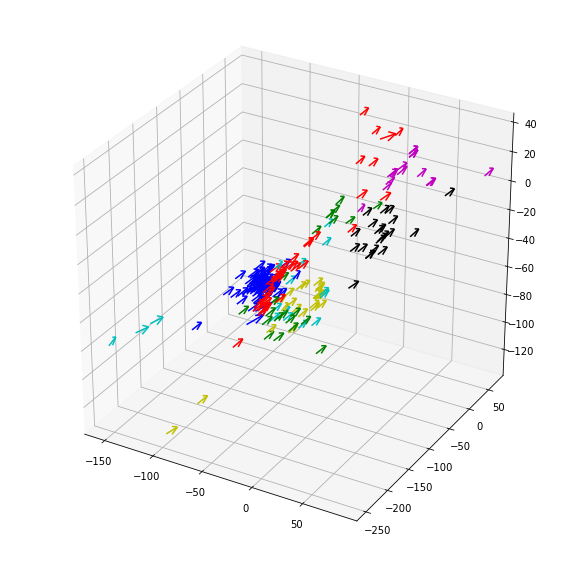

8025.83218621


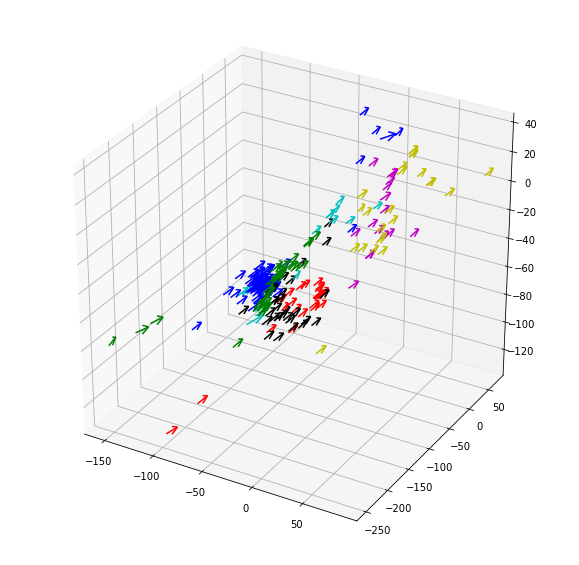

8115.44749702


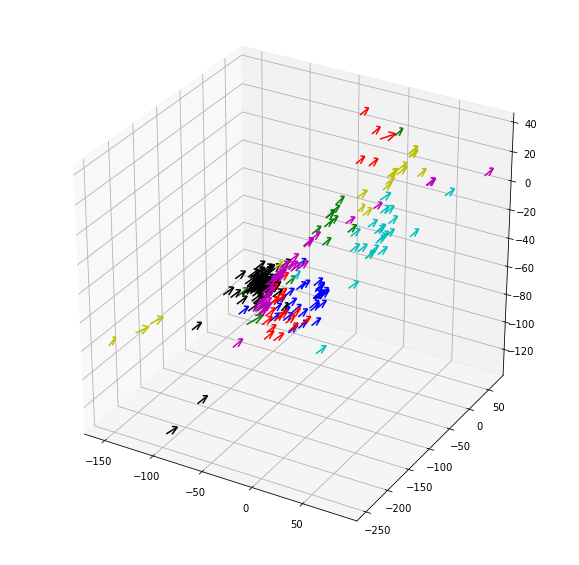

In [19]:
for kcomp in range(2,15):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    gmm = GMM(kcomp, covariance_type='full', random_state=0)
    gmm.fit(X)
    print(gmm.bic(X))
    cluster_label = gmm.predict(X)
    colors=['g','r','b','y','c','k','m']+['g','r','b','y','c','k','m']
    for k in range(kcomp):
        c=gas[cluster_label==k]
        norm=10
        ax.quiver(c.x,c.y,c.z,c.vx/norm,c.vy/norm,c.vz/norm,arrow_length_ratio=0.5,color=colors[k])
    plt.show()

In [17]:
cov=['full','tied','diag','spherical']
for c in cov:

    for kcomp in range(2,15):
    #    fig = plt.figure(figsize=(10,10))
    #    ax = fig.add_subplot(111, projection='3d')
        gmm = GMM(kcomp, covariance_type=c, random_state=0)
        gmm.fit(X)
        print(kcomp,gmm.bic(X),c)
#    cluster_label = gmm.predict(X)
#    colors=['g','r','b','y','c','k','m']+['g','r','b','y','c','k','m']
#    for k in range(kcomp):
#        c=gas[cluster_label==k]
#        norm=10
#        ax.quiver(c.x,c.y,c.z,c.vx/norm,c.vy/norm,c.vz/norm,arrow_length_ratio=0.5,color=colors[k])
#    plt.show()

2 7709.9311667 full
3 7690.18349568 full
4 7526.32971401 full
5 7566.41485285 full
6 7578.48676179 full
7 7716.40599064 full
8 7713.46930105 full
9 7794.23016985 full
10 7962.73059601 full
11 7948.39066578 full
12 7995.31869737 full
13 8025.83218621 full
14 8115.44749702 full
2 7982.57787724 tied
3 7819.74329925 tied
4 7747.99240773 tied
5 7708.55207607 tied
6 7743.3307787 tied
7 7721.70537008 tied
8 7728.30021196 tied
9 7641.32280532 tied
10 7644.61144694 tied
11 7684.69377837 tied
12 7667.27042648 tied
13 7654.66829114 tied
14 7659.10705314 tied
2 10210.1748832 diag
3 9648.56259402 diag
4 9295.61702313 diag
5 9518.03216707 diag
6 9254.2350438 diag
7 9291.67470414 diag
8 9329.32850144 diag
9 9253.34895319 diag
10 9252.44932711 diag
11 9163.59824976 diag
12 9323.67579907 diag
13 9287.818664 diag
14 9335.14079373 diag
2 11359.4020381 spherical
3 11378.4696651 spherical
4 10678.9460243 spherical
5 10781.1849384 spherical
6 10461.0740537 spherical
7 10368.7658156 spherical
8 10373.9176551

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=5, n_init=1, n_iter=100, params='wmc', random_state=0,
  tol=0.001, verbose=0)

7566.4148528450314

In [27]:
dpgmm = BayesianGaussianMixture(n_components=3,
                                        covariance_type='full').fit(X)

In [28]:
cluster_label = dpgmm.predict(X)

In [36]:
cluster_label

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
cl1=gas[cluster_label==1]

In [30]:
cl0=gas[cluster_label==0]

In [31]:
cl2=gas[cluster_label==2]

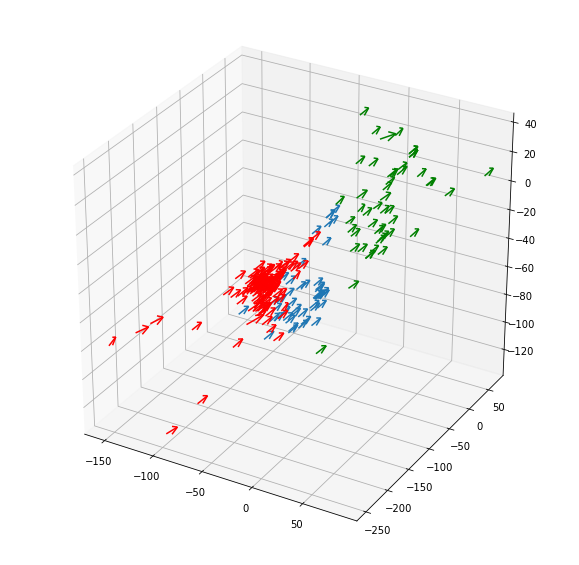

In [23]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
norm=10
ax.quiver(cl0.x,cl0.y,cl0.z,cl0.vx/norm,cl0.vy/norm,cl0.vz/norm,arrow_length_ratio=0.5,color='r')
ax.quiver(cl1.x,cl1.y,cl1.z,cl1.vx/norm,cl1.vy/norm,cl1.vz/norm,arrow_length_ratio=0.5,color='g')
ax.quiver(cl2.x,cl2.y,cl2.z,cl2.vx/norm,cl2.vy/norm,cl2.vz/norm,arrow_length_ratio=0.5)

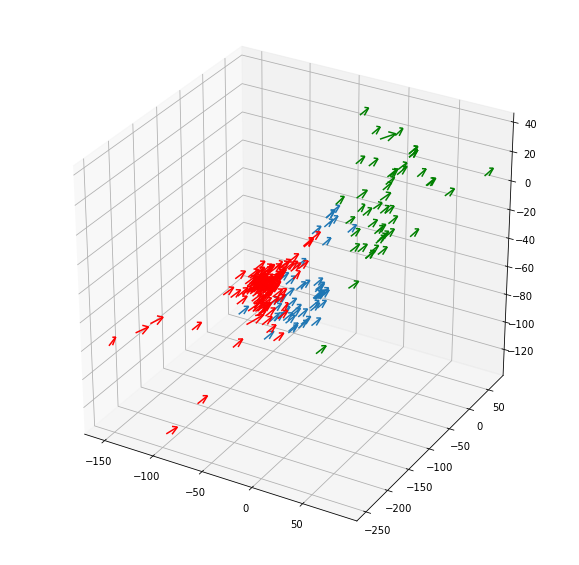

In [33]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
norm=10
ax.quiver(cl0.x,cl0.y,cl0.z,cl0.vx/norm,cl0.vy/norm,cl0.vz/norm,arrow_length_ratio=0.5,color='g')
ax.quiver(cl1.x,cl1.y,cl1.z,cl1.vx/norm,cl1.vy/norm,cl1.vz/norm,arrow_length_ratio=0.5,color='r')
ax.quiver(cl2.x,cl2.y,cl2.z,cl2.vx/norm,cl2.vy/norm,cl2.vz/norm,arrow_length_ratio=0.5)